### Assignment 1 

In [1]:
import numpy as np

In [2]:
with open('diabetes_scale.txt', 'r') as file:
    lines = file.readlines()

# Parse the data into features and labels
X = []
y = []
max_features = 0
for line in lines:
    parts = line.strip().split(' ')
    label = float(parts[0])
    # Change -1 labels to 0
    if label == -1:
        label = 0
    features = [float(part.split(':')[1]) for part in parts[1:]]
    X.append(features)
    y.append(label)
    max_features = max(max_features, len(features))

for i in range(len(X)):
    while len(X[i]) < max_features:
        X[i].append(0.0)

X = np.array(X)
y = np.array(y)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import torch
from torch.utils.data import Dataset, DataLoader

# Create a custom dataset
class DiabetesDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.FloatTensor(features)
        self.labels = torch.FloatTensor(labels)

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]

# Create datasets and data loaders
train_dataset = DiabetesDataset(X_train, y_train)
test_dataset = DiabetesDataset(X_test, y_test)

batch_size = 64  
trainloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [4]:
import torch

In [5]:
import torch.nn as nn
import torch.nn.functional as F

class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.fc = nn.Linear(8, 1) 

    def forward(self, x):
        out = torch.sigmoid(self.fc(x))  # Sigmoid activation for binary classification
        return out

In [6]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
print(device)

# Create your model and move it to the selected device
model = Perceptron(input_size=8)
model.to(device)

cpu


Perceptron(
  (fc): Linear(in_features=8, out_features=1, bias=True)
)

In [7]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.BCELoss()
model = Perceptron(input_size=8)
optimizer = optim.SGD(model.parameters(), lr=0.001)


Epoch [1/10], Loss: 0.6690
Epoch [2/10], Loss: 0.6686
Epoch [3/10], Loss: 0.6675
Epoch [4/10], Loss: 0.6668
Epoch [5/10], Loss: 0.6660
Epoch [6/10], Loss: 0.6647
Epoch [7/10], Loss: 0.6637
Epoch [8/10], Loss: 0.6624
Epoch [9/10], Loss: 0.6623
Epoch [10/10], Loss: 0.6608
Finished Training


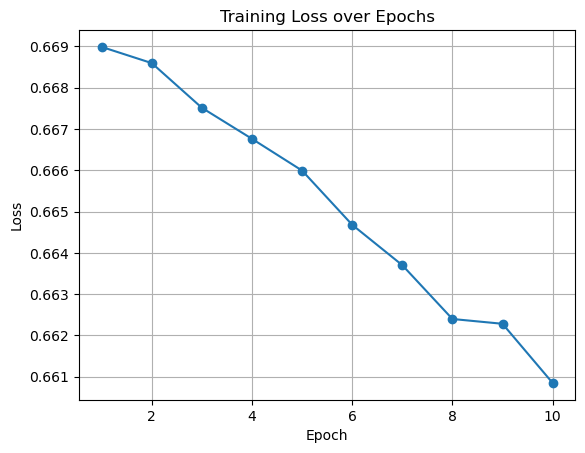

In [8]:
num_epochs = 10
losses = []

for epoch in range(num_epochs):
    total_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))  # Labels should have shape (batch_size, 1)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Print the average loss for this epoch
    avg_loss = total_loss / len(trainloader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

print('Finished Training')

import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), losses, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()

Epoch [1/100], Loss: 0.6604
Epoch [2/100], Loss: 0.6589
Epoch [3/100], Loss: 0.6578
Epoch [4/100], Loss: 0.6572
Epoch [5/100], Loss: 0.6567
Epoch [6/100], Loss: 0.6559
Epoch [7/100], Loss: 0.6554
Epoch [8/100], Loss: 0.6551
Epoch [9/100], Loss: 0.6531
Epoch [10/100], Loss: 0.6533
Epoch [11/100], Loss: 0.6512
Epoch [12/100], Loss: 0.6519
Epoch [13/100], Loss: 0.6502
Epoch [14/100], Loss: 0.6502
Epoch [15/100], Loss: 0.6497
Epoch [16/100], Loss: 0.6478
Epoch [17/100], Loss: 0.6482
Epoch [18/100], Loss: 0.6477
Epoch [19/100], Loss: 0.6465
Epoch [20/100], Loss: 0.6448
Epoch [21/100], Loss: 0.6445
Epoch [22/100], Loss: 0.6448
Epoch [23/100], Loss: 0.6445
Epoch [24/100], Loss: 0.6430
Epoch [25/100], Loss: 0.6427
Epoch [26/100], Loss: 0.6416
Epoch [27/100], Loss: 0.6410
Epoch [28/100], Loss: 0.6408
Epoch [29/100], Loss: 0.6408
Epoch [30/100], Loss: 0.6397
Epoch [31/100], Loss: 0.6404
Epoch [32/100], Loss: 0.6404
Epoch [33/100], Loss: 0.6393
Epoch [34/100], Loss: 0.6379
Epoch [35/100], Loss: 0

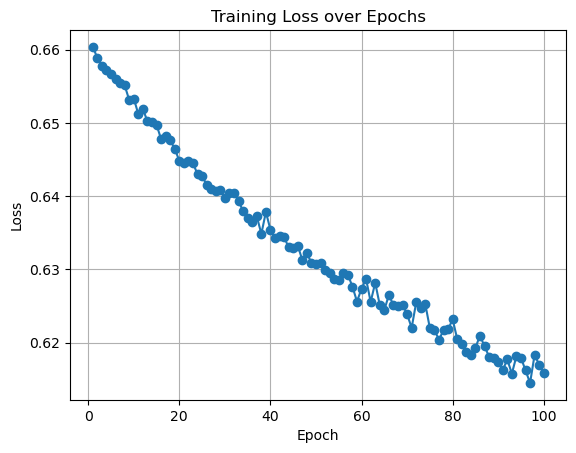

In [9]:
num_epochs = 100
losses = []

for epoch in range(num_epochs):
    total_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))  # Labels should have shape (batch_size, 1)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Print the average loss for this epoch
    avg_loss = total_loss / len(trainloader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

print('Finished Training')

import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), losses, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()


Epoch [1/1000], Loss: 0.6126
Epoch [2/1000], Loss: 0.6172
Epoch [3/1000], Loss: 0.6149
Epoch [4/1000], Loss: 0.6135
Epoch [5/1000], Loss: 0.6164
Epoch [6/1000], Loss: 0.6138
Epoch [7/1000], Loss: 0.6128
Epoch [8/1000], Loss: 0.6170
Epoch [9/1000], Loss: 0.6139
Epoch [10/1000], Loss: 0.6137
Epoch [11/1000], Loss: 0.6156
Epoch [12/1000], Loss: 0.6110
Epoch [13/1000], Loss: 0.6123
Epoch [14/1000], Loss: 0.6153
Epoch [15/1000], Loss: 0.6133
Epoch [16/1000], Loss: 0.6135
Epoch [17/1000], Loss: 0.6102
Epoch [18/1000], Loss: 0.6104
Epoch [19/1000], Loss: 0.6123
Epoch [20/1000], Loss: 0.6119
Epoch [21/1000], Loss: 0.6102
Epoch [22/1000], Loss: 0.6130
Epoch [23/1000], Loss: 0.6122
Epoch [24/1000], Loss: 0.6105
Epoch [25/1000], Loss: 0.6097
Epoch [26/1000], Loss: 0.6110
Epoch [27/1000], Loss: 0.6118
Epoch [28/1000], Loss: 0.6116
Epoch [29/1000], Loss: 0.6100
Epoch [30/1000], Loss: 0.6097
Epoch [31/1000], Loss: 0.6086
Epoch [32/1000], Loss: 0.6085
Epoch [33/1000], Loss: 0.6097
Epoch [34/1000], Lo

Epoch [339/1000], Loss: 0.5848
Epoch [340/1000], Loss: 0.5877
Epoch [341/1000], Loss: 0.5852
Epoch [342/1000], Loss: 0.5887
Epoch [343/1000], Loss: 0.5892
Epoch [344/1000], Loss: 0.5869
Epoch [345/1000], Loss: 0.5865
Epoch [346/1000], Loss: 0.5896
Epoch [347/1000], Loss: 0.5871
Epoch [348/1000], Loss: 0.5847
Epoch [349/1000], Loss: 0.5840
Epoch [350/1000], Loss: 0.5839
Epoch [351/1000], Loss: 0.5890
Epoch [352/1000], Loss: 0.5875
Epoch [353/1000], Loss: 0.5862
Epoch [354/1000], Loss: 0.5891
Epoch [355/1000], Loss: 0.5840
Epoch [356/1000], Loss: 0.5825
Epoch [357/1000], Loss: 0.5879
Epoch [358/1000], Loss: 0.5825
Epoch [359/1000], Loss: 0.5859
Epoch [360/1000], Loss: 0.5853
Epoch [361/1000], Loss: 0.5872
Epoch [362/1000], Loss: 0.5844
Epoch [363/1000], Loss: 0.5815
Epoch [364/1000], Loss: 0.5864
Epoch [365/1000], Loss: 0.5869
Epoch [366/1000], Loss: 0.5830
Epoch [367/1000], Loss: 0.5831
Epoch [368/1000], Loss: 0.5830
Epoch [369/1000], Loss: 0.5822
Epoch [370/1000], Loss: 0.5808
Epoch [3

Epoch [691/1000], Loss: 0.5673
Epoch [692/1000], Loss: 0.5717
Epoch [693/1000], Loss: 0.5711
Epoch [694/1000], Loss: 0.5715
Epoch [695/1000], Loss: 0.5661
Epoch [696/1000], Loss: 0.5683
Epoch [697/1000], Loss: 0.5742
Epoch [698/1000], Loss: 0.5711
Epoch [699/1000], Loss: 0.5726
Epoch [700/1000], Loss: 0.5680
Epoch [701/1000], Loss: 0.5667
Epoch [702/1000], Loss: 0.5732
Epoch [703/1000], Loss: 0.5717
Epoch [704/1000], Loss: 0.5683
Epoch [705/1000], Loss: 0.5680
Epoch [706/1000], Loss: 0.5731
Epoch [707/1000], Loss: 0.5710
Epoch [708/1000], Loss: 0.5685
Epoch [709/1000], Loss: 0.5695
Epoch [710/1000], Loss: 0.5715
Epoch [711/1000], Loss: 0.5703
Epoch [712/1000], Loss: 0.5678
Epoch [713/1000], Loss: 0.5691
Epoch [714/1000], Loss: 0.5712
Epoch [715/1000], Loss: 0.5722
Epoch [716/1000], Loss: 0.5695
Epoch [717/1000], Loss: 0.5700
Epoch [718/1000], Loss: 0.5682
Epoch [719/1000], Loss: 0.5673
Epoch [720/1000], Loss: 0.5690
Epoch [721/1000], Loss: 0.5656
Epoch [722/1000], Loss: 0.5683
Epoch [7

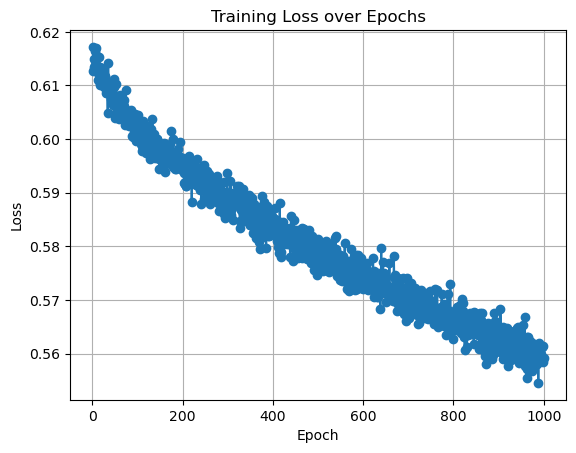

In [10]:
num_epochs = 1000
losses = []

for epoch in range(num_epochs):
    total_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))  # Labels should have shape (batch_size, 1)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Print the average loss for this epoch
    avg_loss = total_loss / len(trainloader)
    losses.append(avg_loss)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

print('Finished Training')

import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), losses, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.grid(True)
plt.show()

In [11]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)
        predicted_labels = (outputs.squeeze() > 0.5).float()
        total += labels.size(0)
        correct += (predicted_labels == labels).sum().item()

accuracy = correct / total
print('Test Accuracy: {:.2f}%'.format(accuracy * 100))


Test Accuracy: 70.78%
